In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Data Analysis

In [2]:
df = pd.read_csv("/kaggle/input/houseprice/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
#df = df.drop(['ocean_proximity'], axis = 1)
#df.head()

# Splitting Data

In [11]:
#x = df.drop( columns = ['median_house_value'])
x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

print(x.shape)
print(y.shape)

(20433, 9)
(20433,)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9978,-122.46,38.53,32.0,1735.0,331.0,785.0,309.0,3.6641,INLAND,275800.0
10565,-117.76,33.72,15.0,941.0,266.0,366.0,248.0,4.3636,<1H OCEAN,148400.0
8012,-118.12,33.85,37.0,2386.0,409.0,1101.0,399.0,4.6908,<1H OCEAN,218200.0
5914,-118.45,34.29,30.0,762.0,228.0,840.0,226.0,2.3375,<1H OCEAN,154200.0
18071,-122.01,37.28,22.0,2038.0,260.0,773.0,281.0,9.1569,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
953,-121.96,37.71,6.0,8072.0,1050.0,3386.0,1062.0,7.2494,<1H OCEAN,336500.0
4694,-118.37,34.07,52.0,2195.0,435.0,884.0,432.0,5.2400,<1H OCEAN,486400.0
17557,-121.89,37.33,42.0,1279.0,358.0,1254.0,340.0,2.2583,<1H OCEAN,192500.0
14240,-117.09,32.70,22.0,2409.0,582.0,1887.0,578.0,1.4089,NEAR OCEAN,94200.0


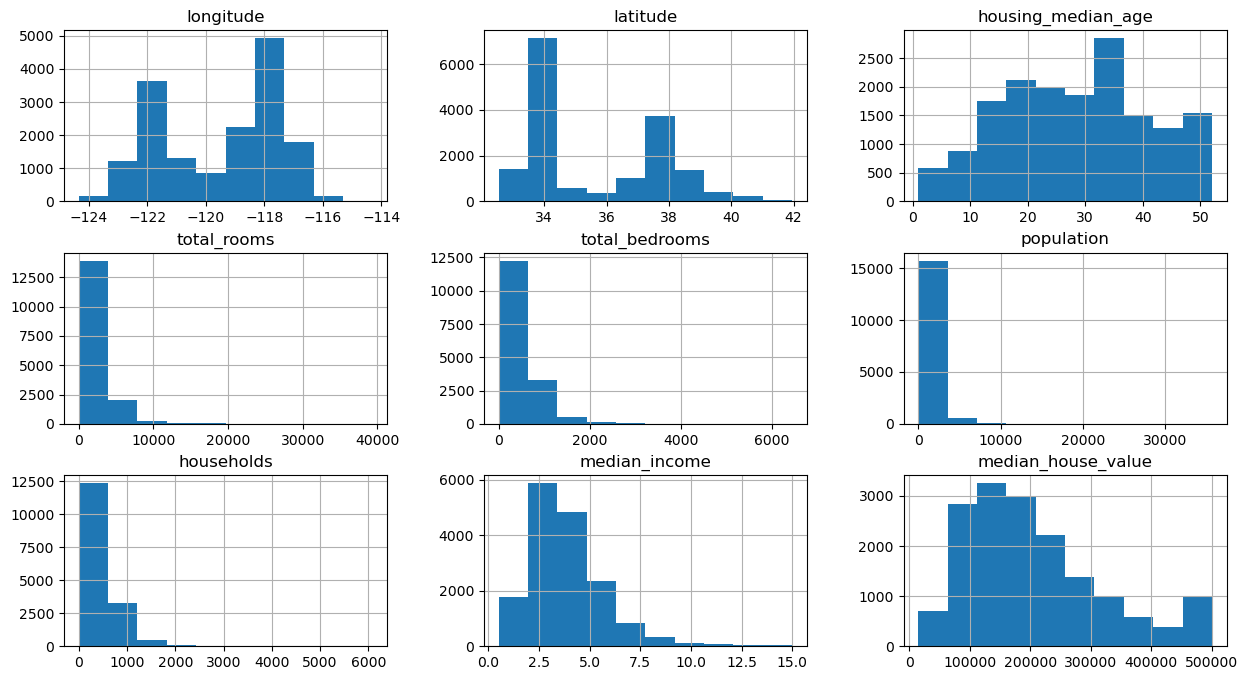

In [14]:
train_data.hist(figsize=(15,8))
plt.show()

/tmp/ipykernel_32/879112812.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


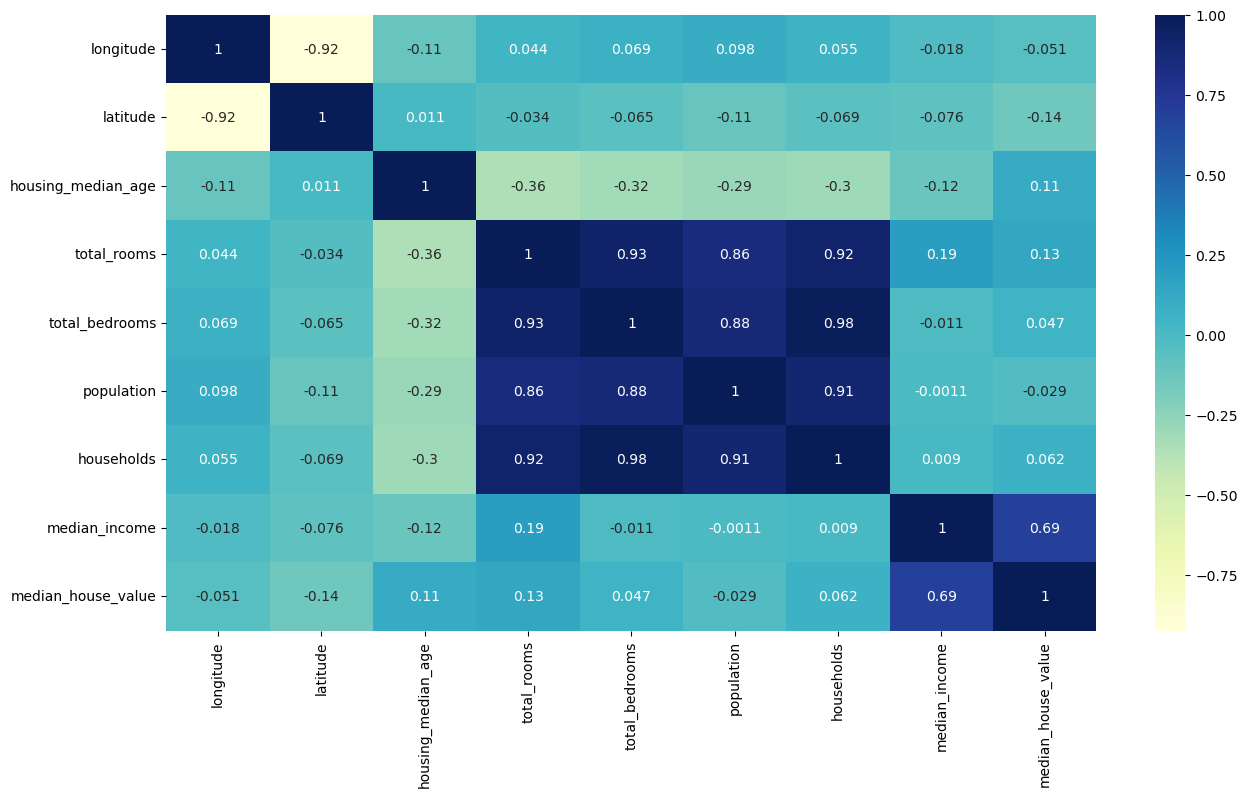

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

# Feature Engineering

In [16]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

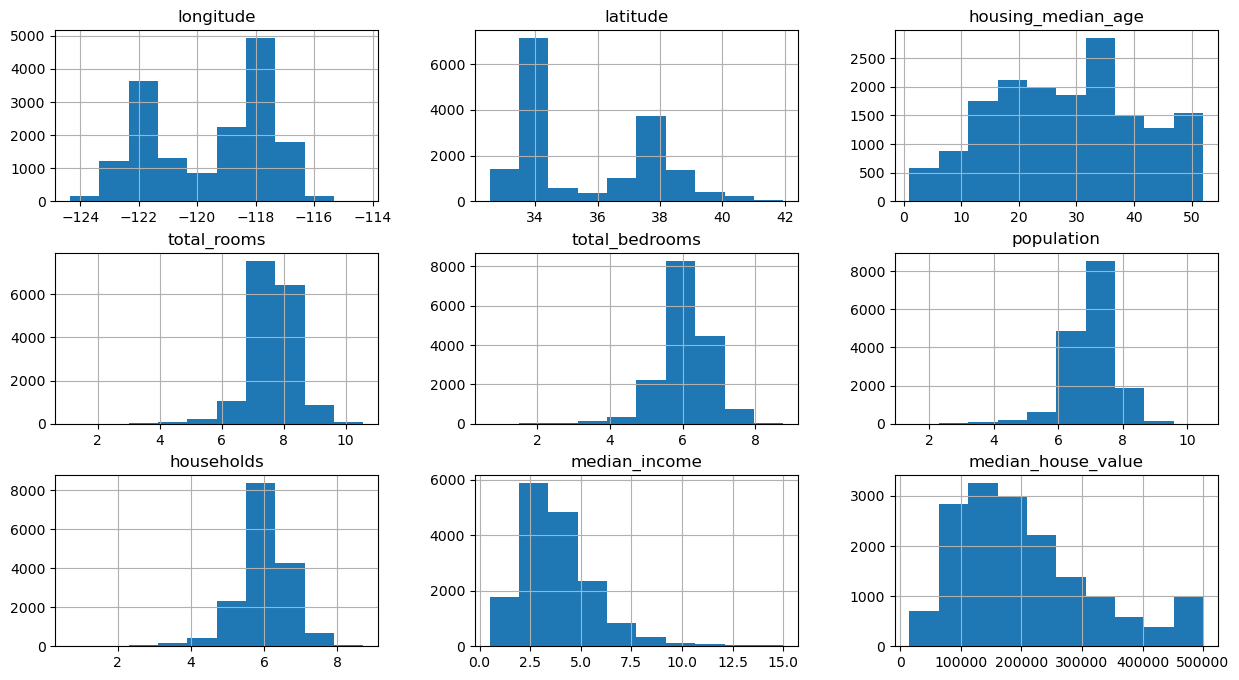

In [17]:
train_data.hist(figsize=(15,8))
plt.show()

In [18]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7196
INLAND        5200
NEAR OCEAN    2108
NEAR BAY      1839
ISLAND           3
Name: ocean_proximity, dtype: int64

In [19]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9978,-122.46,38.53,32.0,7.459339,5.805135,6.666957,5.736572,3.6641,275800.0,0,1,0,0,0
10565,-117.76,33.72,15.0,6.848005,5.587249,5.905362,5.517453,4.3636,148400.0,1,0,0,0,0
8012,-118.12,33.85,37.0,7.777793,6.016157,7.004882,5.991465,4.6908,218200.0,1,0,0,0,0
5914,-118.45,34.29,30.0,6.637258,5.433722,6.734592,5.424950,2.3375,154200.0,1,0,0,0,0
18071,-122.01,37.28,22.0,7.620215,5.564520,6.651572,5.641907,9.1569,500001.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,-121.96,37.71,6.0,8.996280,6.957497,8.127700,6.968850,7.2494,336500.0,1,0,0,0,0
4694,-118.37,34.07,52.0,7.694393,6.077642,6.785588,6.070738,5.2400,486400.0,1,0,0,0,0
17557,-121.89,37.33,42.0,7.154615,5.883322,7.134891,5.831882,2.2583,192500.0,1,0,0,0,0
14240,-117.09,32.70,22.0,7.787382,6.368187,7.543273,6.361302,1.4089,94200.0,0,0,0,0,1


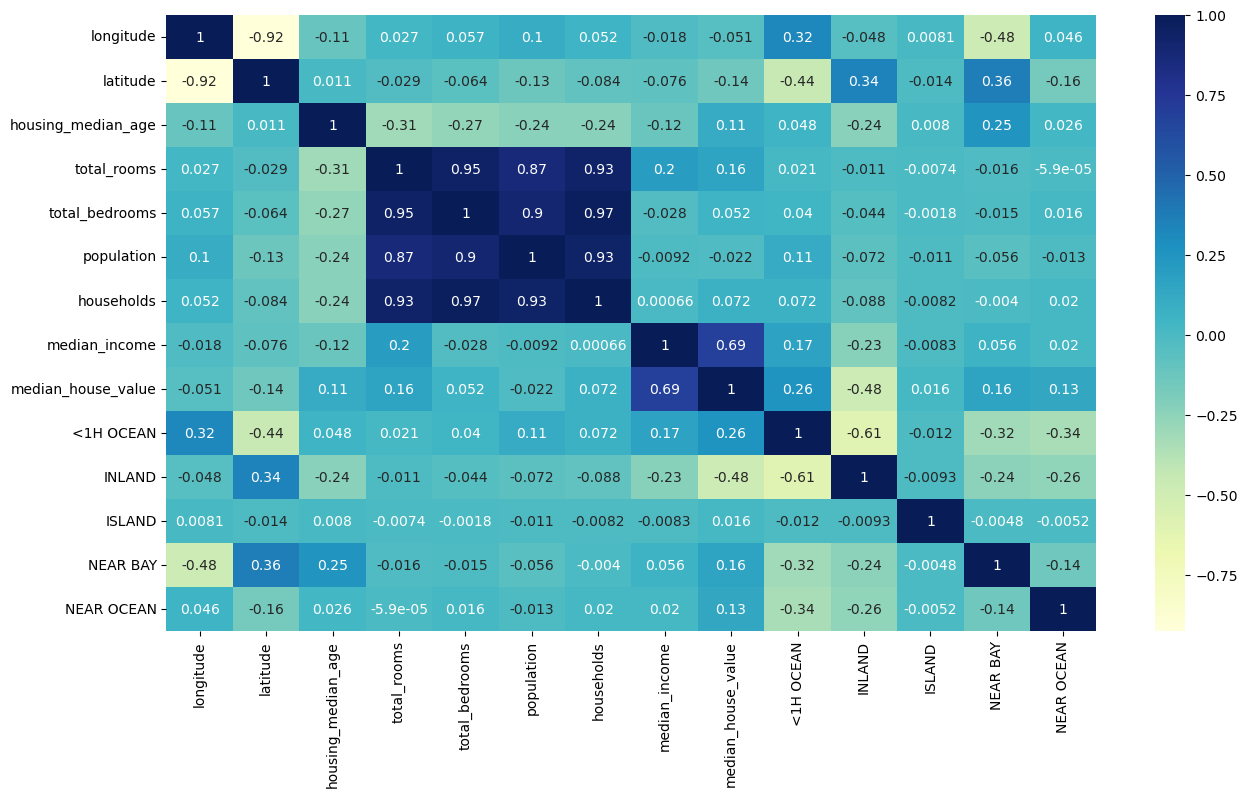

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [21]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']
train_data['bedroom_ratio'] = train_data['total_rooms']/ train_data['households']

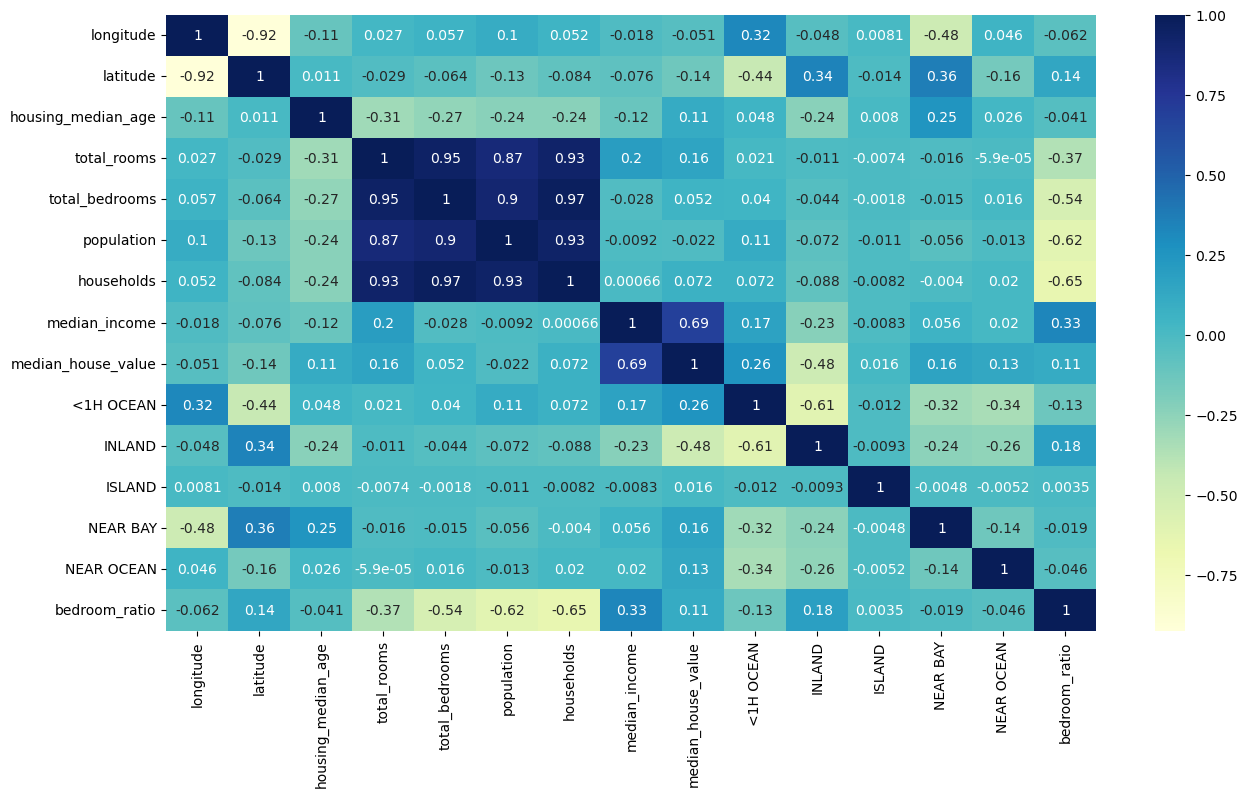

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

# Fit Model

In [23]:
#model = LinearRegression()
#model.fit(x_train, y_train)

In [24]:
#prediction = model.predict(x_test)
#prediction

In [25]:
#MAE = metrics.mean_absolute_error(y_test, prediction)
#MAE

In [26]:
x_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [27]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)


test_data = test_data.join(pd.get_dummies (test_data.ocean_proximity)). drop(['ocean_proximity'], axis=1) 

test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['bedroom_ratio'] = test_data['total_rooms']/ test_data['households']

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
1825,-122.32,37.93,33.0,5.693732,4.304065,5.379897,4.158883,2.6750,22500.0,0,0,0,1,0,1.369053
4908,-118.26,34.01,46.0,6.779922,5.537334,6.918695,5.402677,2.1776,118300.0,1,0,0,0,0,1.254919
11384,-117.95,33.66,26.0,7.488853,5.429346,6.461468,5.416100,6.8226,329800.0,1,0,0,0,0,1.382702
19077,-122.49,38.27,8.0,8.535622,6.896694,7.413367,6.842683,3.5625,213200.0,0,0,0,1,0,1.247409
3678,-118.38,34.21,35.0,7.292337,5.717028,7.167038,5.707110,3.7708,170600.0,1,0,0,0,0,1.277763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18499,-121.74,37.35,34.0,6.089045,4.510860,5.384495,4.543295,5.2327,500001.0,1,0,0,0,0,1.340227
1247,-122.33,39.10,10.0,5.587249,4.143135,5.043425,3.912023,2.2500,75000.0,0,1,0,0,0,1.428225
10087,-117.97,33.94,36.0,7.534228,5.826000,6.854355,5.783825,4.1205,217000.0,1,0,0,0,0,1.302638
7775,-118.09,33.90,36.0,7.103322,5.634790,6.760415,5.655992,3.7604,158700.0,1,0,0,0,0,1.255893


In [28]:
x_test, y_test = test_data.drop(['median_house_value'], axis= 1), test_data['median_house_value']
reg.score(x_test,y_test)

0.6769136247738174

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [30]:
forest.score(x_test, y_test)

0.8158912261118194

In [33]:
forest.score(x_train, y_train)

0.9748562526890553

In [31]:
# How to scale data (informative!!!!)

# scaler = standardscaler()
# X_train_s = scaler.fit_transfor(X_train)
#reg.fit(X_train_s, y_train)


#x_test_s = scaler.transform(x_test)
#reg.score(x_test_s, y_test)